In [ ]:
# Calculates overlap integral based on circular or hexagonal subapertures

In [1]:
import poppy
import pickle
import pandas as pd
import numpy as np
import astropy.modeling
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# define scale of apertures of all modeled subaperture shapes

length_scale = 3. # m; this is r of circular pupil, and half of the hex side-to-side dim
wavel_scale = 6.3e-6 # m
pixel_scale = 0.010 
fov = 5.0 # arcsec

## Circular pupil

In [3]:
# circular pupil

osys_circ = poppy.OpticalSystem()
aper_circ = poppy.CircularAperture(radius=length_scale)
#aper_circ_fits = aper_circ.to_fits()
poppy.Wavefront
osys_circ.add_pupil(aper_circ)    # pupil radius in meters
#osys_circ.display()

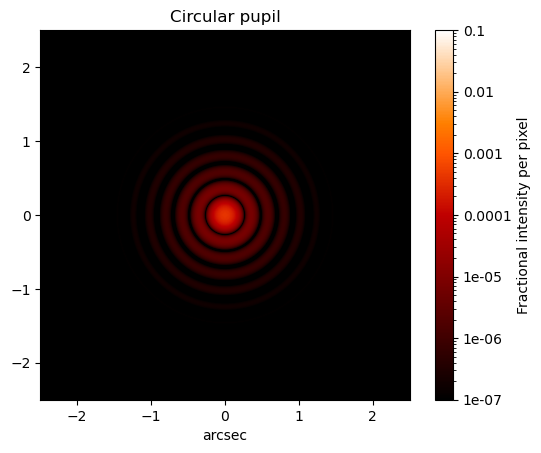

In [4]:
osys_circ.add_detector(pixelscale=pixel_scale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psf_circ = osys_circ.calc_psf(wavel_scale)                            # wavelength in meters
poppy.display_psf(psf_circ, title='Circular pupil')

## Hexagonal pupil

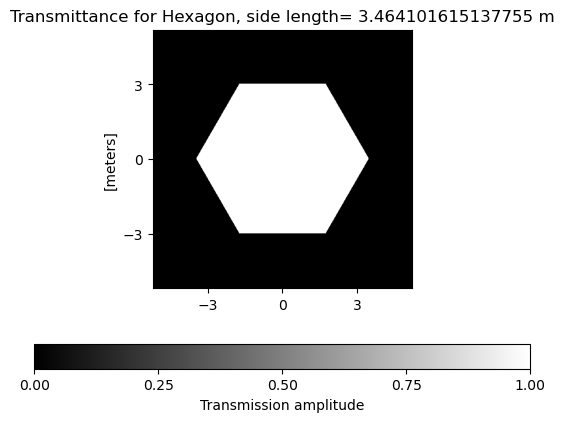

In [5]:
# hexagonal pupil

osys_hex = poppy.OpticalSystem()
aper_hex = poppy.HexagonAperture(flattoflat=2.*length_scale)
aper_hex_fits = aper_hex.to_fits()
osys_hex.add_pupil(aper_hex)

osys_hex.display()

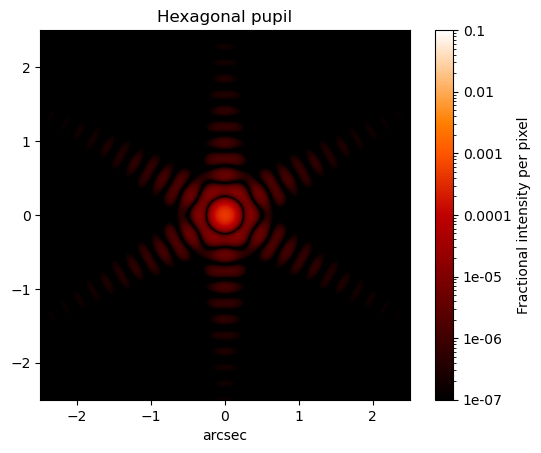

In [6]:
osys_hex.add_detector(pixelscale=pixel_scale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psf_hex = osys_hex.calc_psf(wavel_scale)                            # wavelength in meters
poppy.display_psf(psf_hex, title='Hexagonal pupil')

In [7]:
# read in waveguide mode profile

'''
S. Gross:

The waveguide modes have a 4sigma diameter of 8.3x7.6um. 
A simple Gaussian fit gives a 1/e2 diameter of 5.8x5.4um. 
Both at a wavelength of 1550nm.

The attached CSV file contains the corresponding intensity profile. 
The scale is 0.2161um per pixel.
'''

stem = '/Users/bandari/Documents/git.repos/glint_misc/notebooks/data/'

open_file = open(stem + 'waveguide_intensity.pkl', "rb")
df_intensity, xycen = pickle.load(open_file)
open_file.close()

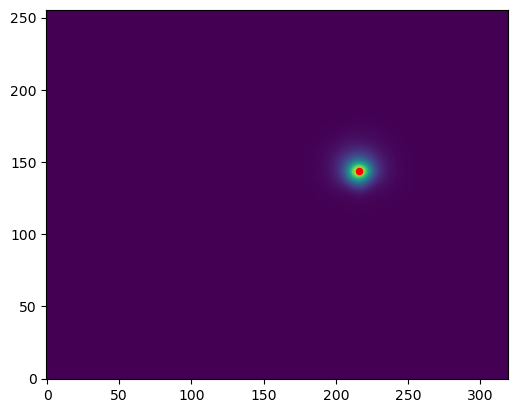

In [8]:
plt.imshow(df_intensity, origin="lower")
plt.scatter(xycen[0],xycen[1], color='red', s=20)
plt.show()

In [9]:
# cutouts

buffer = 100 # pix
waveguide_cutout = df_intensity[int(xycen[1]-buffer):int(xycen[1]+buffer),int(xycen[0]-buffer):int(xycen[0]+buffer)]
cutout_airy = psf_circ[0].data[int(0.5*psf_circ[0].data.shape[0])-buffer:int(0.5*psf_circ[0].data.shape[0])+buffer,int(0.5*psf_circ[0].data.shape[1])-buffer:int(0.5*psf_circ[0].data.shape[1])+buffer]
cutout_hex = psf_hex[0].data[int(0.5*psf_hex[0].data.shape[0])-buffer:int(0.5*psf_hex[0].data.shape[0])+buffer,int(0.5*psf_hex[0].data.shape[1])-buffer:int(0.5*psf_hex[0].data.shape[1])+buffer]

In [10]:
# for secondary physical axes: 0.2161um per pixel.

def pix2um(x):
    return x*0.2161

def um2pix(x):
    return x/0.2161

In [11]:
# radius of first dark ring in um

wavel = 1.55 # um
foc_length = 400 # um
D = 66 # um

circ_r_um = 1.22 * wavel * foc_length/D
circ_r_pix = um2pix(circ_r_um)

In [12]:
# for checking scaling of illumination

'''
fig, ax = plt.subplots(layout='constrained')

ax.imshow(waveguide_cutout, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], origin='lower')
ax.set_xlabel('pixel')
ax.set_ylabel('pixel')

ax.imshow(cutout_airy, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], alpha=1, norm='log')

circ_cen_x = 0
circ_cen_y = 0 
circ = Circle((circ_cen_x,circ_cen_y),radius=circ_r_pix,color='white',fill=False)
ax.add_patch(circ)

secax = ax.secondary_xaxis('top', functions=(pix2um, um2pix))
secax.set_xlabel('physical (um)')
secay = ax.secondary_yaxis('right', functions=(pix2um, um2pix))
secay.set_ylabel('physical (um)')
plt.show()
'''

"\nfig, ax = plt.subplots(layout='constrained')\n\nax.imshow(waveguide_cutout, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], origin='lower')\nax.set_xlabel('pixel')\nax.set_ylabel('pixel')\n\nax.imshow(cutout_airy, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], alpha=1, norm='log')\n\ncirc_cen_x = 0\ncirc_cen_y = 0 \ncirc = Circle((circ_cen_x,circ_cen_y),radius=circ_r_pix,color='white',fill=False)\nax.add_patch(circ)\n\nsecax = ax.secondary_xaxis('top', functions=(pix2um, um2pix))\nsecax.set_xlabel('physical (um)')\nsecay = ax.secondary_yaxis('right', functions=(pix2um, um2pix))\nsecay.set_ylabel('physical (um)')\nplt.show()\n"

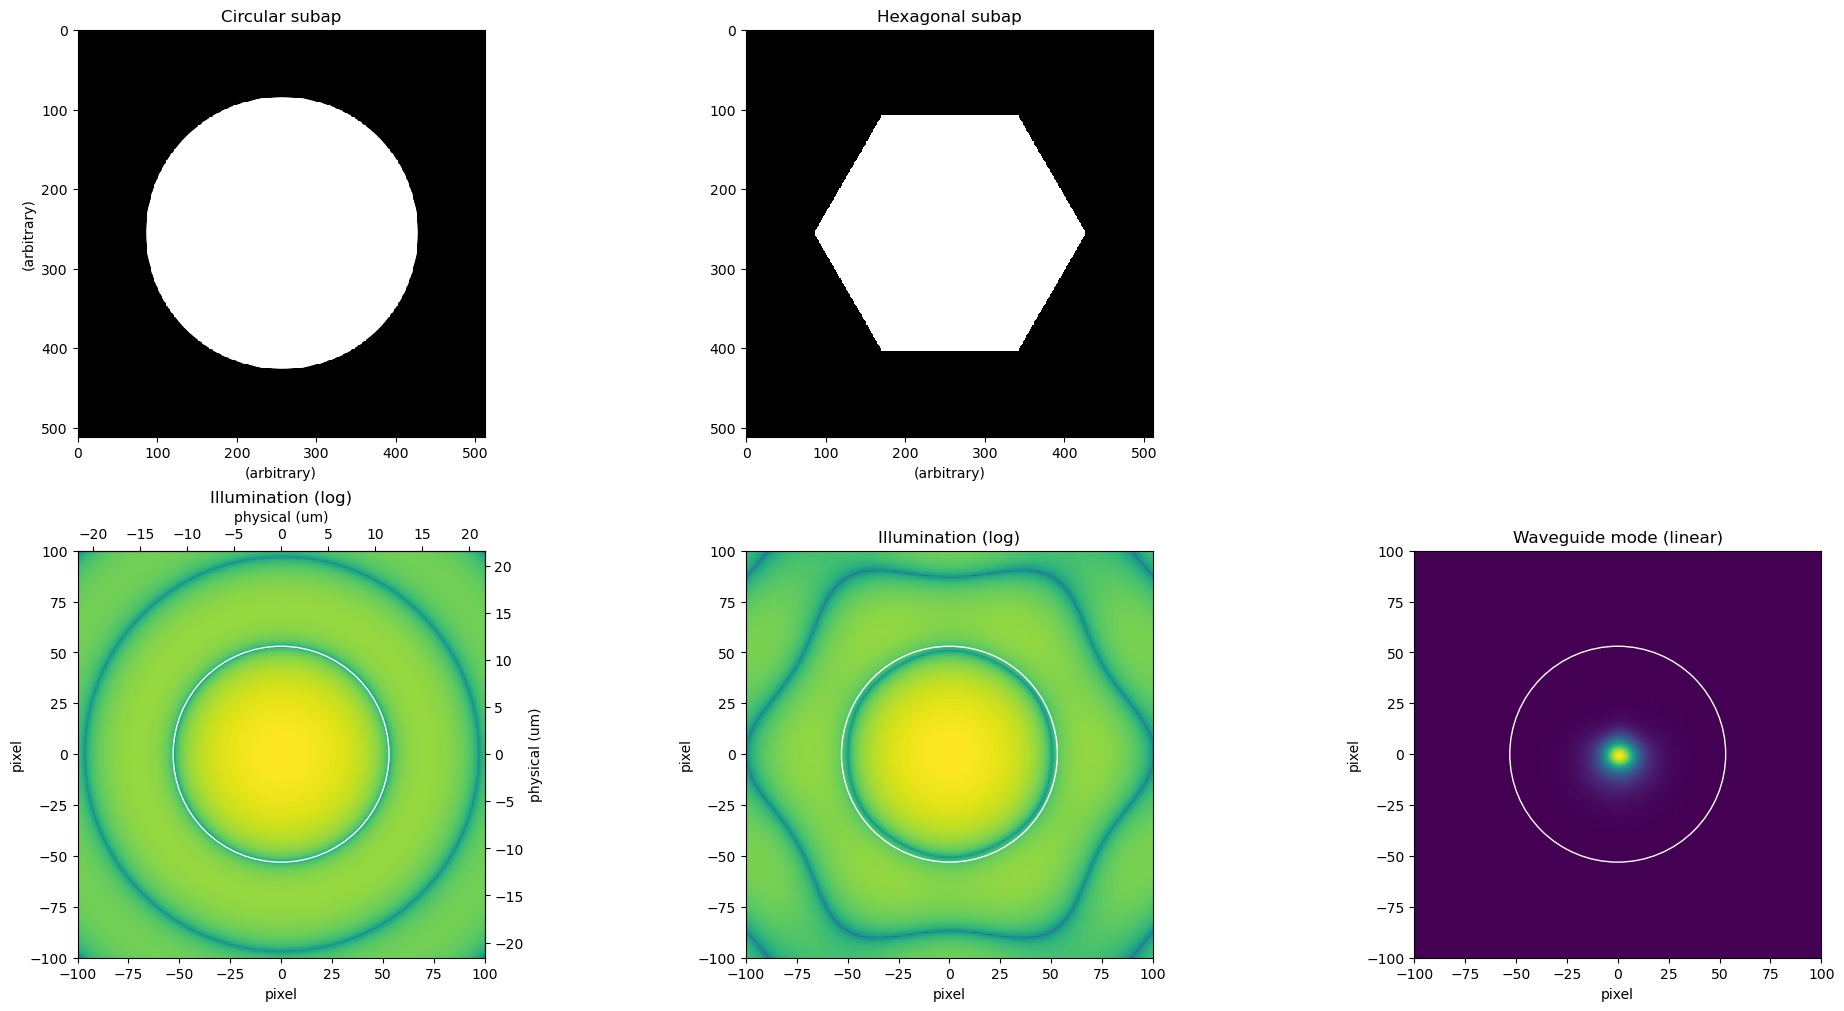

In [13]:
# define circle for scale in plots
circ_cen_x = 0
circ_cen_y = 0 
circ1 = Circle((circ_cen_x,circ_cen_y),radius=circ_r_pix,color='white',fill=False)
circ2 = Circle((circ_cen_x,circ_cen_y),radius=circ_r_pix,color='white',fill=False)
circ3 = Circle((circ_cen_x,circ_cen_y),radius=circ_r_pix,color='white',fill=False)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10), layout='constrained')

ax[0,0].set_title('Circular subap')
ax[0,0].imshow(aper_circ_fits[0].data, cmap='Greys_r', interpolation='nearest')
ax[0,0].set_xlabel('(arbitrary)')
ax[0,0].set_ylabel('(arbitrary)')

ax[0,1].set_title('Hexagonal subap')
ax[0,1].imshow(aper_hex_fits[0].data, cmap='Greys_r', interpolation='nearest')
ax[0,1].set_xlabel('(arbitrary)')
#ax[0,0].set_tick_params(labelbottom=False)
#ax[0,0].set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
#ax.set_xticks([])
#ax.set_yticks([])

ax[1,0].set_title('Illumination (log)')
ax[1,0].imshow(cutout_airy, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], alpha=1, norm='log')
ax[1,0].set_xlabel('pixel')
ax[1,0].set_ylabel('pixel')
ax[1,0].add_patch(circ1)

#ax[1,1].imshow(waveguide_cutout, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], origin='lower')

ax[1,1].set_title('Illumination (log)')
ax[1,1].imshow(cutout_hex, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], alpha=1, norm='log')
ax[1,1].set_xlabel('pixel')
ax[1,1].set_ylabel('pixel')
ax[1,1].add_patch(circ2)

ax[1,2].set_title('Waveguide mode (linear)')
ax[1,2].imshow(waveguide_cutout, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ], alpha=1)
ax[1,2].set_xlabel('pixel')
ax[1,2].set_ylabel('pixel')
ax[1,2].add_patch(circ3)

secax = ax[1,0].secondary_xaxis('top', functions=(pix2um, um2pix))
secax.set_xlabel('physical (um)')
secay = ax[1,0].secondary_yaxis('right', functions=(pix2um, um2pix))
secay.set_ylabel('physical (um)')

fig.delaxes(ax[0,2])

plt.savefig('junk.pdf')

In [14]:
# overlap integral

# normalize the waveguide_cutout (not sure if this is kosher)
#waveguide_cutout_norm = np.divide(waveguide_cutout,np.sum(waveguide_cutout))
#waveguide_cutout = waveguide_cutout_norm

'''
numerator_term_airy = np.power( np.sum( np.multiply(cutout_airy,waveguide_cutout) ) ,2)
denominator_term_airy = np.power(np.sum(cutout_airy),2) * np.power(np.sum(waveguide_cutout),2)

numerator_term_hex = np.power( np.sum( np.multiply(cutout_hex,waveguide_cutout) ) ,2)
denominator_term_hex = np.power(np.sum(cutout_hex),2) * np.power(np.sum(waveguide_cutout),2)

eta_coeff_airy = np.divide(numerator_term_airy,denominator_term_airy)
eta_coeff_hex = np.divide(numerator_term_hex,denominator_term_hex)
'''

'\nnumerator_term_airy = np.power( np.sum( np.multiply(cutout_airy,waveguide_cutout) ) ,2)\ndenominator_term_airy = np.power(np.sum(cutout_airy),2) * np.power(np.sum(waveguide_cutout),2)\n\nnumerator_term_hex = np.power( np.sum( np.multiply(cutout_hex,waveguide_cutout) ) ,2)\ndenominator_term_hex = np.power(np.sum(cutout_hex),2) * np.power(np.sum(waveguide_cutout),2)\n\neta_coeff_airy = np.divide(numerator_term_airy,denominator_term_airy)\neta_coeff_hex = np.divide(numerator_term_hex,denominator_term_hex)\n'

In [15]:
# make 'intensity' terms: E*E

I_airy = np.real(cutout_airy * np.conj(cutout_airy))

I_hex = np.real(cutout_hex * np.conj(cutout_hex))

I_waveguide = np.real(waveguide_cutout * np.conj(waveguide_cutout))

I_waveguide_x_airy = np.real(waveguide_cutout * np.conj(cutout_airy))

I_waveguide_x_hex = np.real(waveguide_cutout * np.conj(cutout_hex))

In [16]:
# eta_coeff_airy
# integrate by summing over all elements

numerator_airy = np.power(np.sum(I_waveguide_x_airy),2.)
denominator_airy = np.sum(I_airy) * np.sum(I_waveguide)

eta_coeff_airy = numerator_airy/denominator_airy

In [17]:
# eta_coeff_hex

numerator_hex = np.power(np.sum(I_waveguide_x_hex),2.)
denominator_hex = np.sum(I_hex) * np.sum(I_waveguide)

eta_coeff_hex = numerator_hex/denominator_hex

In [18]:
eta_coeff_airy

0.4997358831736659

In [19]:
eta_coeff_hex

0.5321273310304653